In [138]:
%load_ext autoreload
%autoreload 2

# Set matplotlib to generate retina quality plots
%config InlineBackend.figure_format = 'retina'

import librosa
from matplotlib import pyplot as plt
import numpy as np
import stumpy as st
from librosa.display import waveshow
import seaborn as sns
import utils as u
import ipywidgets as widgets
from pathlib import Path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
sns.set_theme(palette="pastel")

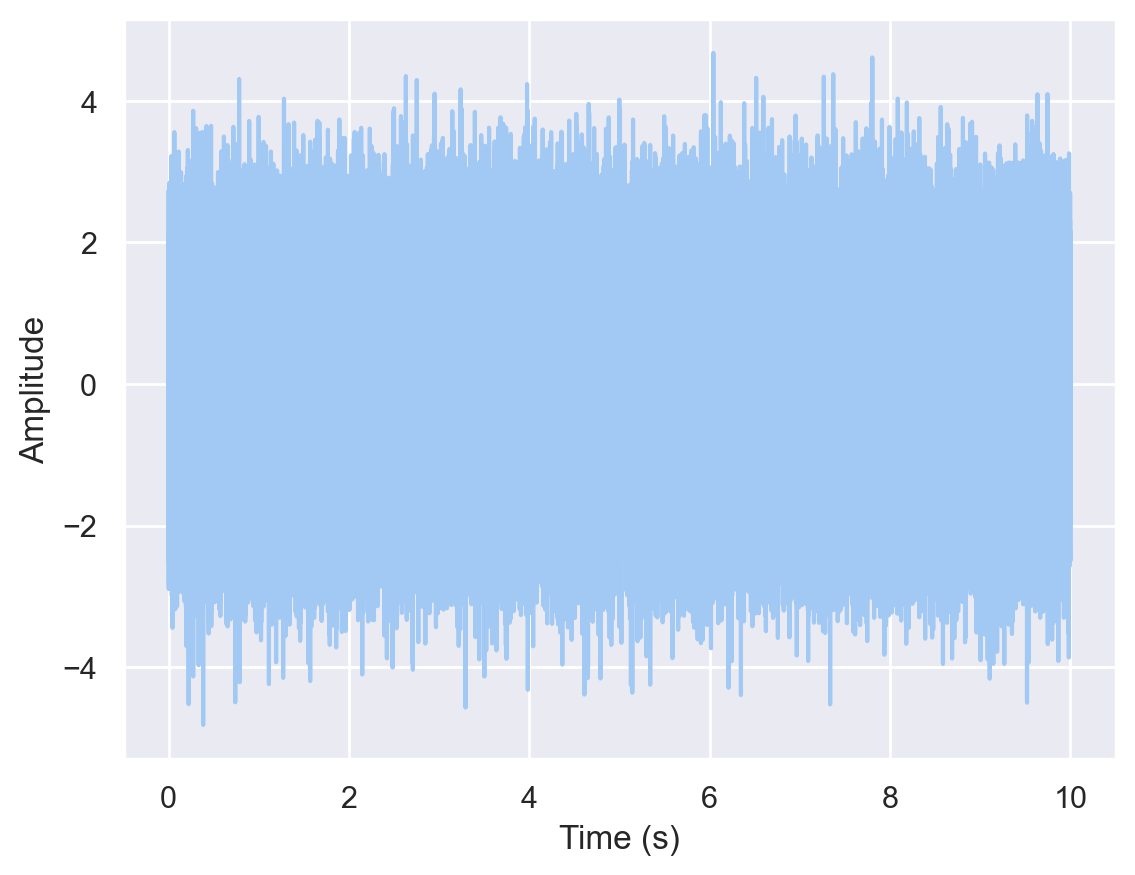

In [140]:
# Use seaborn to plot audio signal data
def plot_audio(data, sample_rate):
    t = np.linspace(0, data.shape[0] / sample_rate, data.shape[0])
    plt.plot(t, data)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

plot_audio(u.generate_noise(T=10), 44100)

In [141]:
sr = 44100
T = 2
# Length of a 4 second loop
L = sr * 1

noise = u.generate_noise(T=T, sample_rate=sr)
noise_profile = st.stump(noise, L)

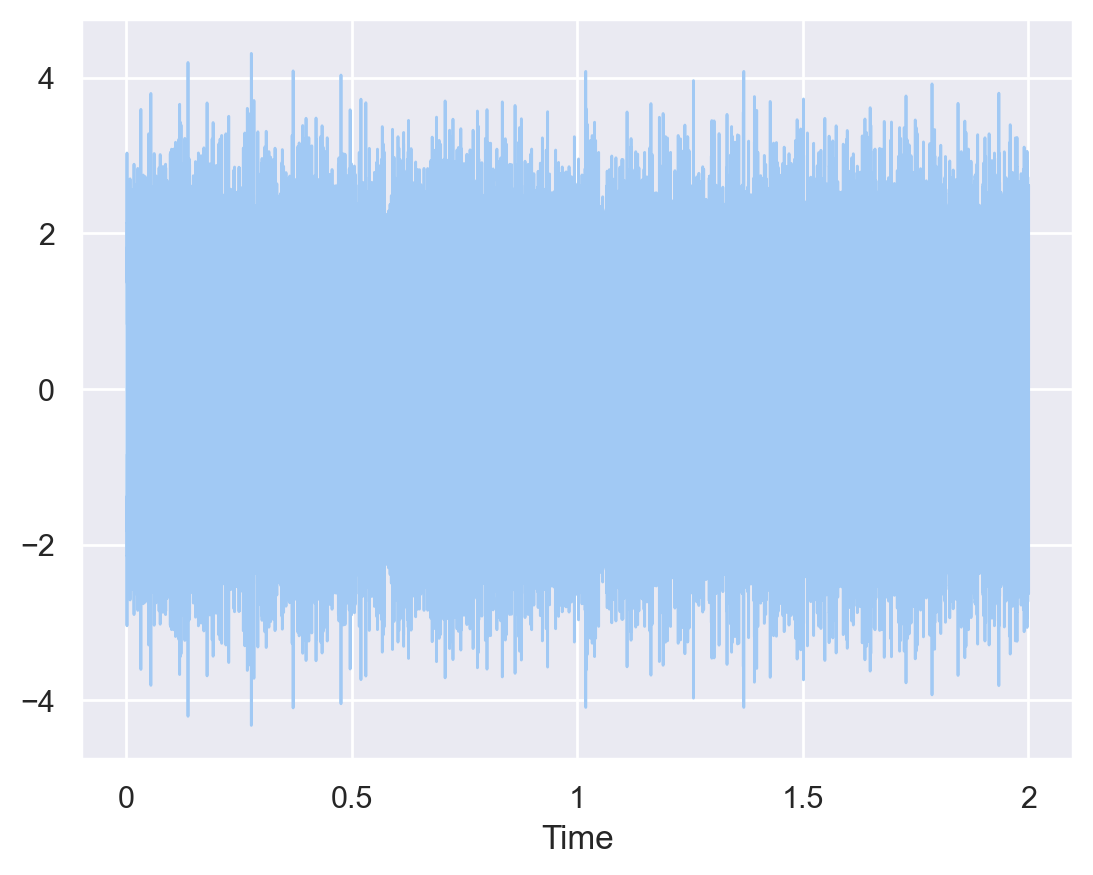

In [142]:
waveshow(noise, sr=sr)

In [143]:
u.write_wav(Path("test_noise.wav"), sr, noise)

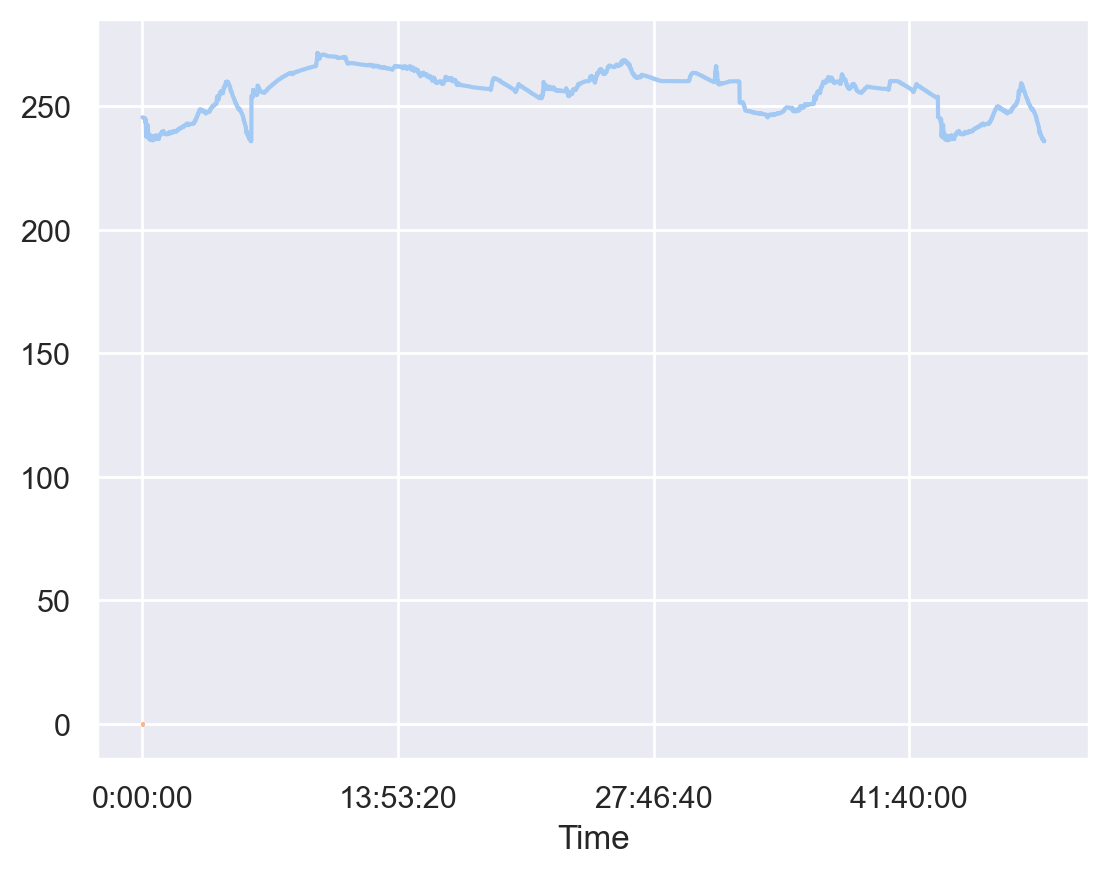

In [144]:
# Generate music
T = 10
music, sr = u.generate_music(duration=T)

# Length of a 4 second loop
L = sr * 2

# Compute the STUMP profile
music_profile = st.stump(music.astype(np.float64), L)

# Visualize the STUMP profile
plt.plot(music_profile[:, 0])

# Use librosa.display to visualize the stumpy profile
waveshow(music, sr=sr)

In [145]:
u.write_wav(Path("music.wav"), sr, music)

from IPython.display import Audio
Audio('music.wav')

In [146]:
parameter = widgets.IntSlider(min=245, max=500, value=245)
display(parameter)


IntSlider(value=245, max=500, min=245)

Text(0.5, 1.0, 'Matrix Profile Waveplot')

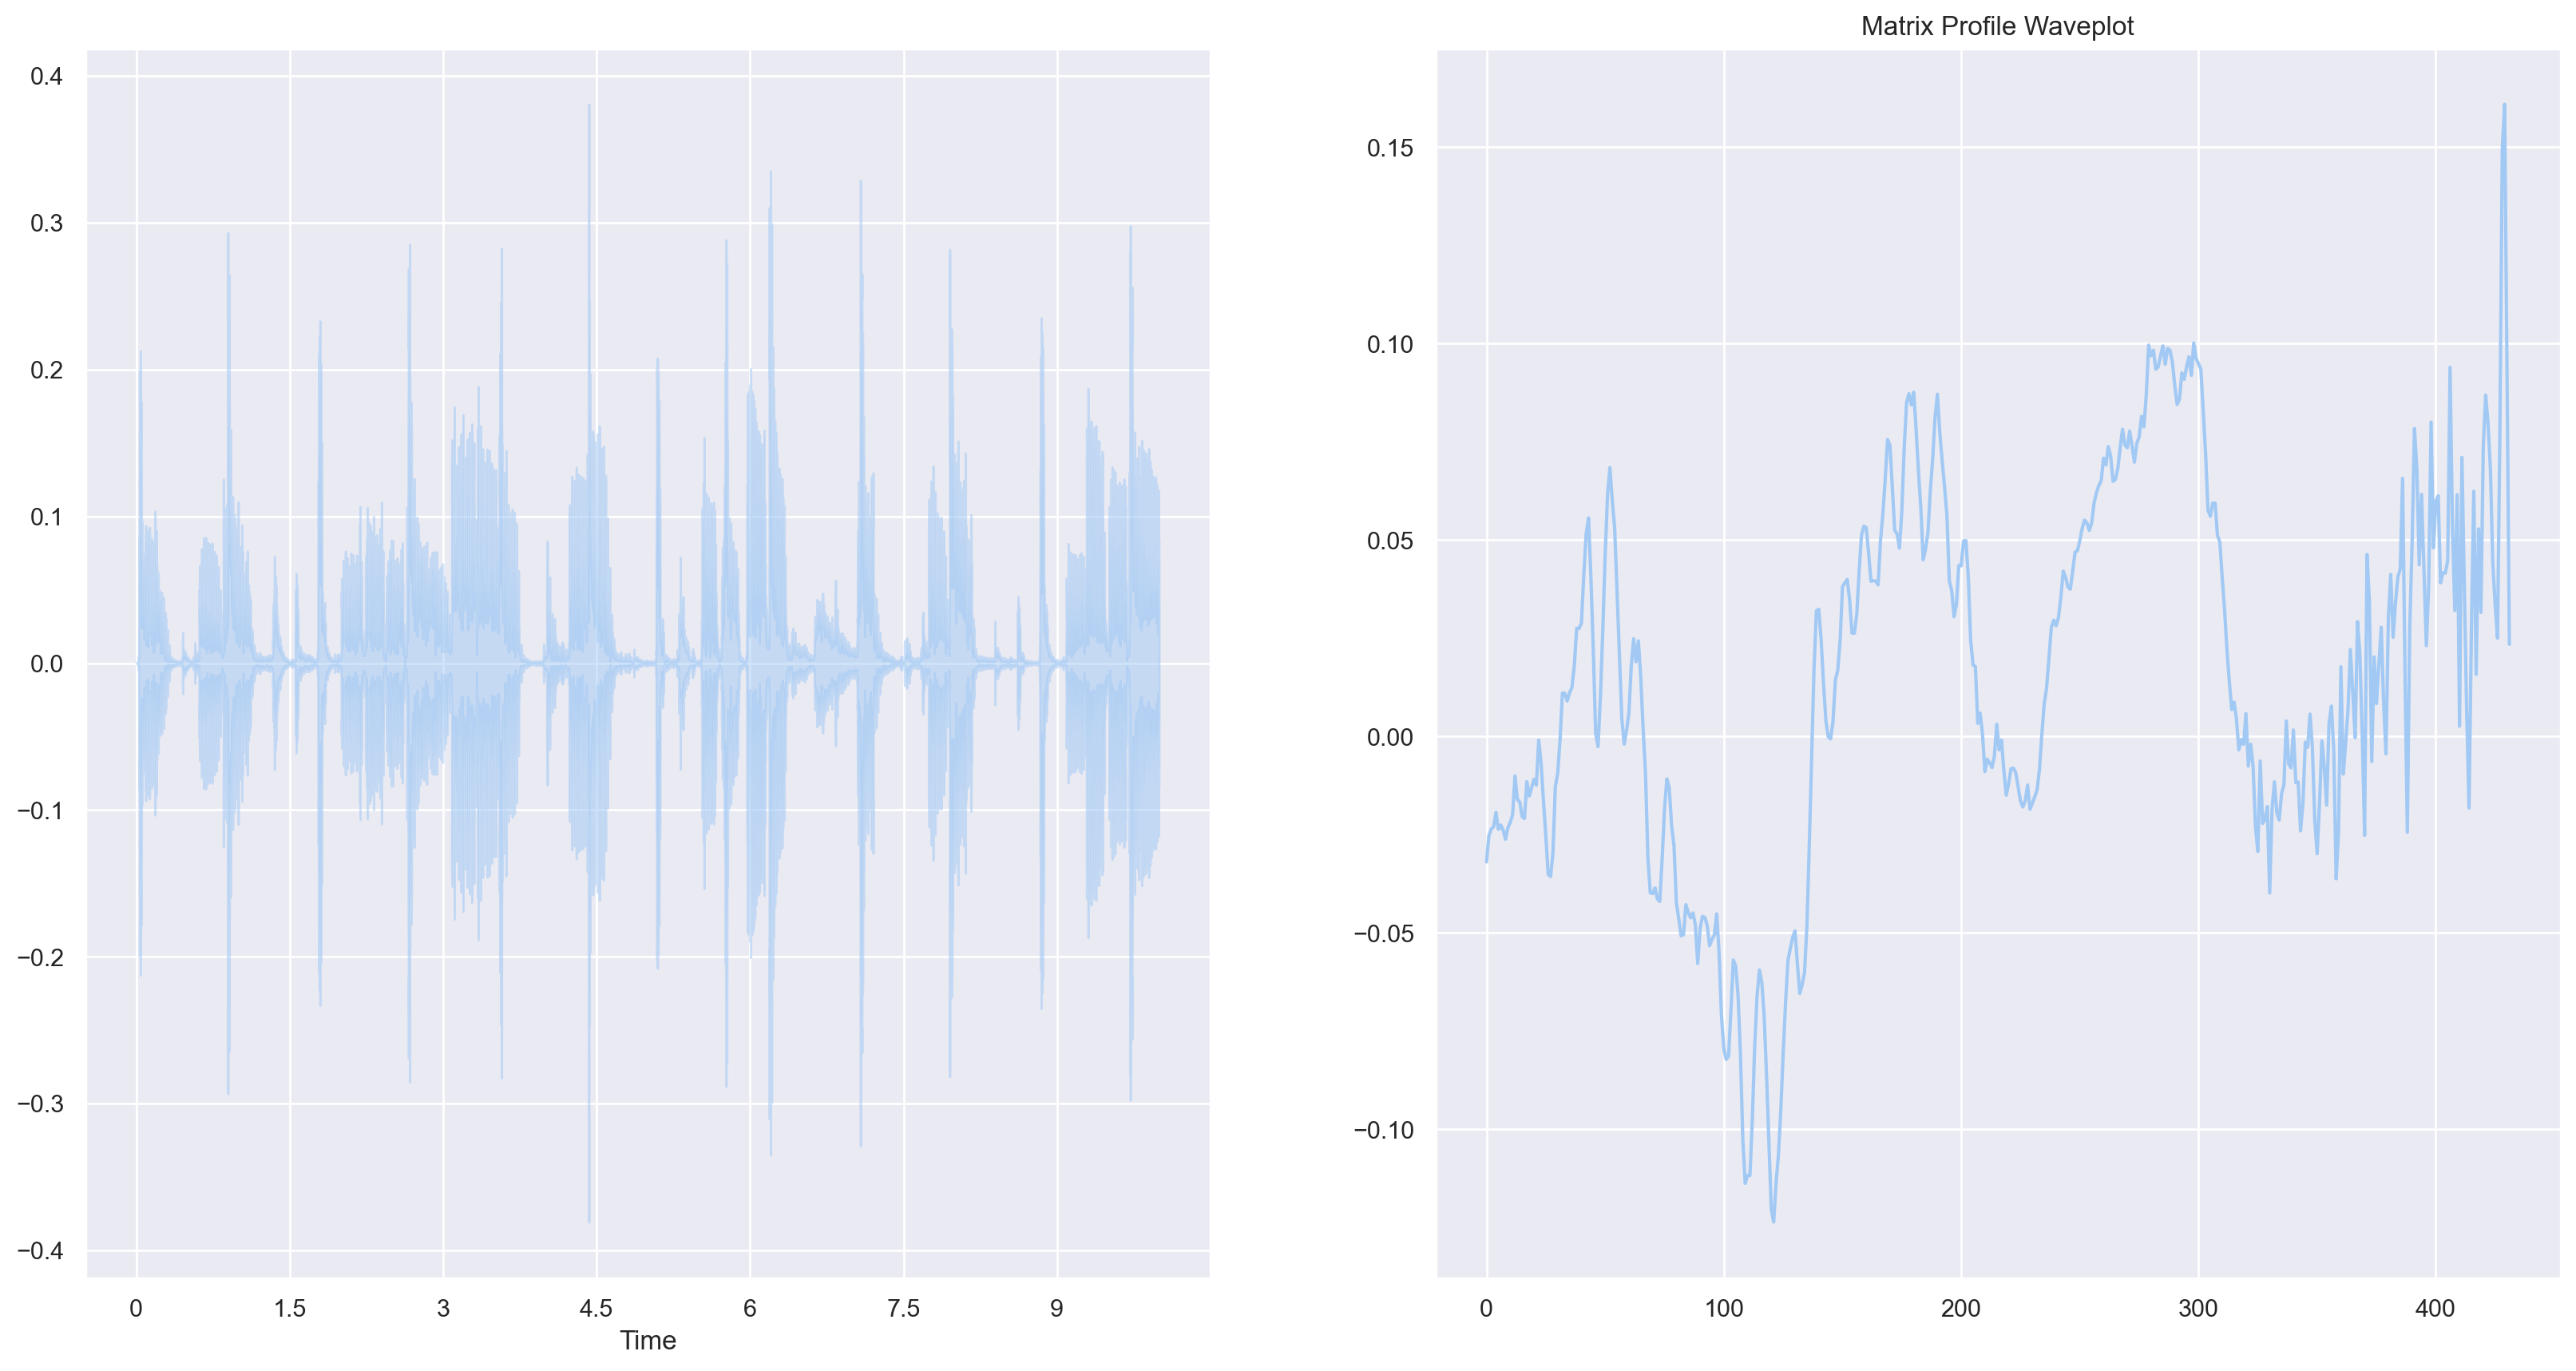

In [148]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
plt.plot(music[155598:155598 + parameter.value])
# # Visualize the matrix profile with librosa.display.waveplot
librosa.display.waveshow(
    music,
    sr=sr,
    alpha=0.5,
    ax=ax[0],
)
plt.title('Matrix Profile Waveplot')

In [149]:
y, sr = librosa.load(librosa.ex('nutcracker'))

hop_length = 1024

chroma = librosa.feature.chroma_cqt(y=y, sr=sr, hop_length=hop_length)

# Use time-delay embedding to get a cleaner recurrence matrix

chroma_stack = librosa.feature.stack_memory(chroma, n_steps=10, delay=3)

R = librosa.segment.recurrence_matrix(chroma_stack)
R_aff = librosa.segment.recurrence_matrix(chroma_stack, metric='cosine', mode='affinity')

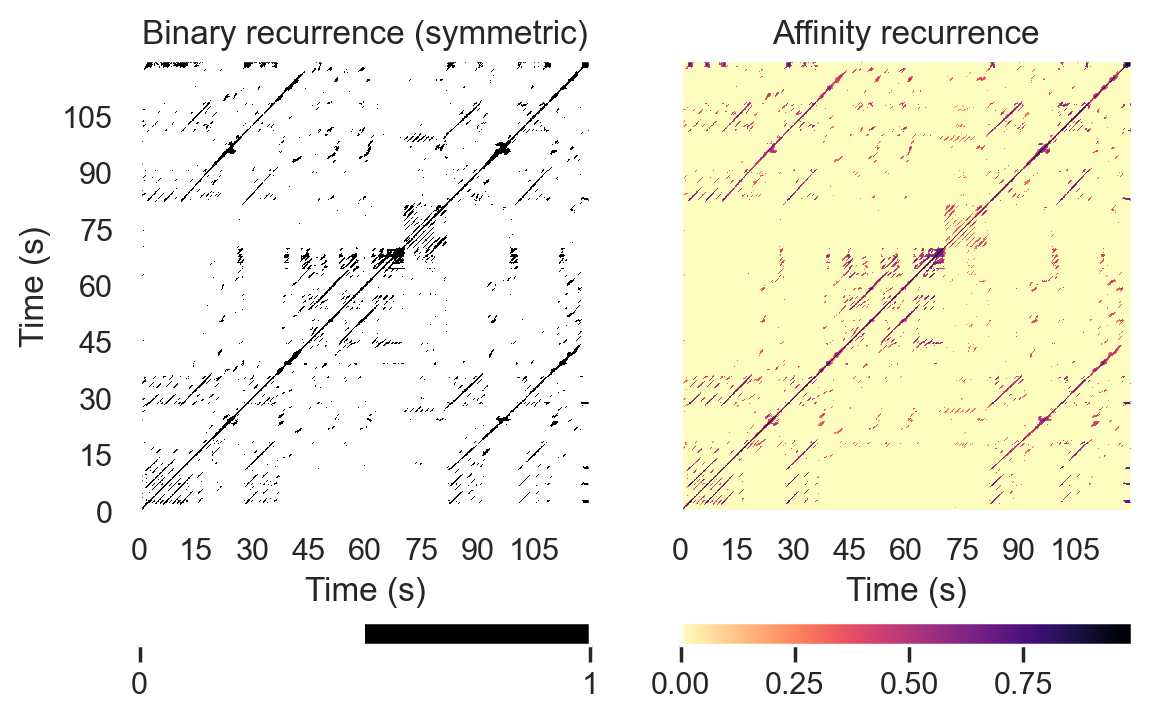

In [150]:
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)

imgsim = librosa.display.specshow(
    R, x_axis="s", y_axis="s", hop_length=hop_length, ax=ax[0]
)

ax[0].set(title="Binary recurrence (symmetric)")

imgaff = librosa.display.specshow(
    R_aff, x_axis="s", y_axis="s", hop_length=hop_length, cmap="magma_r", ax=ax[1]
)

ax[1].set(title="Affinity recurrence")

ax[1].label_outer()

fig.colorbar(imgsim, ax=ax[0], orientation="horizontal", ticks=[0, 1])

fig.colorbar(imgaff, ax=ax[1], orientation="horizontal")
